# **HOMELESSNESS**


<p><i>Homelessness is a state of being unhoused or unsheltered. It is a complex social issue that occurs when individuals or families lack a stable, safe, and permanent place to live. It can result from a combination of economic, social, and personal factors. It is also a multifaceted problem with varying causes and consequences.</i></p>

<p><img style ="float: left; margin:20px 45px 20px 5px; width:90%" src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2t_83mFlgjhoBOxi6Qs7UZ23rEeeE1RLYsQ&usqp=CAU';alt='Homeless Person'></p>

In [1]:
#import the necessary data libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

<p> So, we will import our dataset using the <code> pandas read_csv</code> function</p>


In [2]:
#Let us read the dataset
homelessness = pd.read_csv('homelessness.csv', index_col=0)
homelessness.head(10)

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588
5,Mountain,Colorado,7607,3250,5691287
6,New England,Connecticut,2280,1696,3571520
7,South Atlantic,Delaware,708,374,965479
8,South Atlantic,District of Columbia,3770,3134,701547
9,South Atlantic,Florida,21443,9587,21244317


In [3]:
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          51 non-null     object
 1   state           51 non-null     object
 2   individuals     51 non-null     int64 
 3   family_members  51 non-null     int64 
 4   state_pop       51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


<p><i>Next, we use <code> pandas describe</code> function to get the statistical summary of the homelessness dataset.</i></p>

In [4]:
homelessness.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


In [5]:
#Check the size of the dataset
homelessness.shape

(51, 5)

In [6]:
homelessness.columns


Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [7]:
#Check for null values
homelessness.isnull().sum()

region            0
state             0
individuals       0
family_members    0
state_pop         0
dtype: int64

## **DATA VISUALIZATION**

<Axes: >

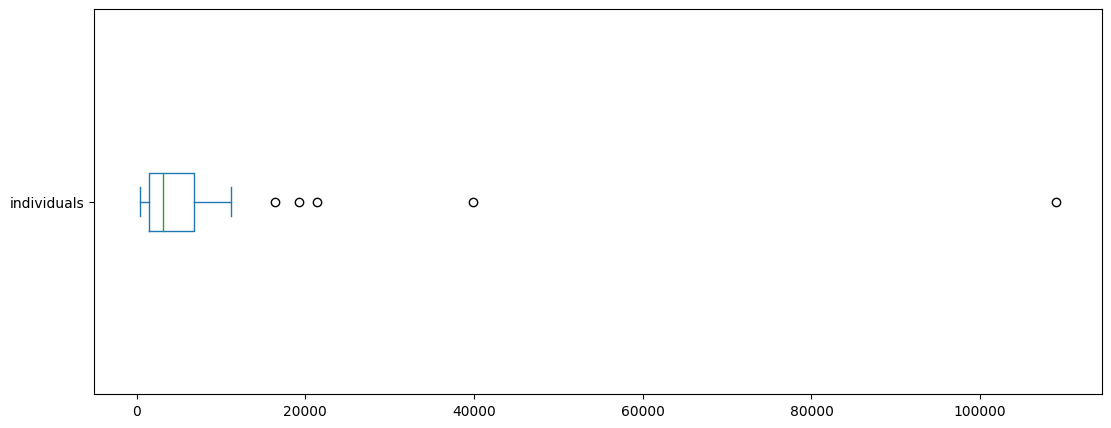

In [8]:
#Check the property of individual feature and outliers 
homelessness['individuals'].plot(kind='box', vert=False, figsize=(13,5))

<Axes: ylabel='Density'>

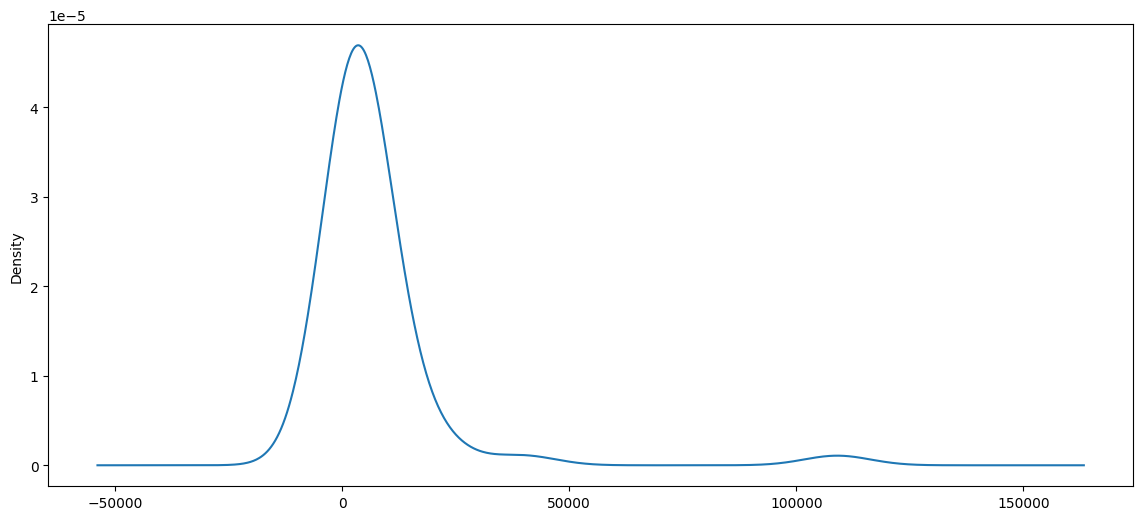

In [9]:
homelessness['individuals'].plot(kind ='density', figsize =(14,6))

<Axes: xlabel='individuals', ylabel='state_pop'>

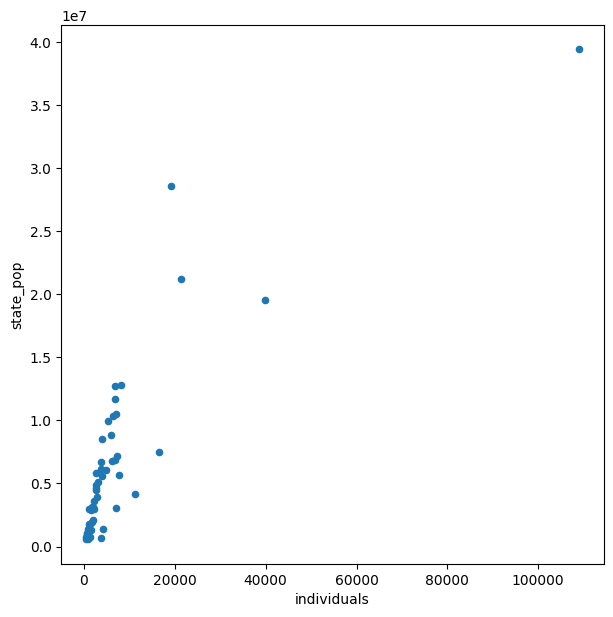

In [10]:
homelessness.plot(kind='scatter', x='individuals', y='state_pop', figsize=(7,7))

<Axes: xlabel='family_members', ylabel='state_pop'>

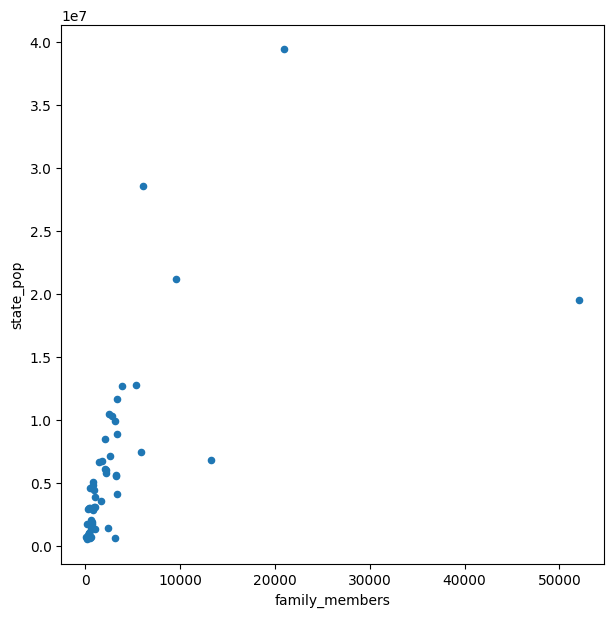

In [11]:
homelessness.plot(kind='scatter', x='family_members', y='state_pop', figsize=(7,7))

In [12]:
#Sort the values by the number of homeless individuals form smallest to largest 
homelessness_ind = homelessness.sort_values('individuals')
homelessness_ind.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434,205,577601
34,West North Central,North Dakota,467,75,758080
7,South Atlantic,Delaware,708,374,965479
39,New England,Rhode Island,747,354,1058287
45,New England,Vermont,780,511,624358


## *Categorical Analysis and Visualization*

In [13]:
homelessness['state'].value_counts()

state
Alabama                 1
Pennsylvania            1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Rhode Island            1
Montana                 1
South Carolina          1
South Dakota            1
Tennessee               1
Texas                   1
Utah                    1
Vermont                 1
Virginia                1
Washington              1
West Virginia           1
Wisconsin               1
Nebraska                1
Missouri                1
Alaska                  1
Idaho                   1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Illino

<Axes: ylabel='count'>

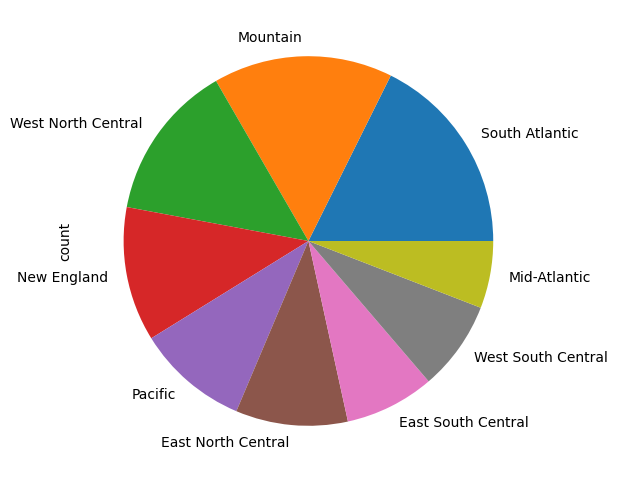

In [14]:
homelessness['region'].value_counts().plot(kind='pie', figsize=(6,6))

In [15]:
homelessness.loc[homelessness['state']=='California']

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008,20964,39461588


In [16]:
#Let us check for the highest population

pop = homelessness.loc[homelessness['state_pop'] == homelessness['state_pop'].max(), 'state'].unique()
print(f'State with highest population: {pop}')

State with highest population: ['California']


In [17]:
#State with the highest family member
fam=homelessness.loc[homelessness['family_members']==homelessness['family_members'].max(),'state'].unique()
print(f'State with highest Family members: {fam}')

State with highest Family members: ['New York']


### **DATA VISUALISATION**

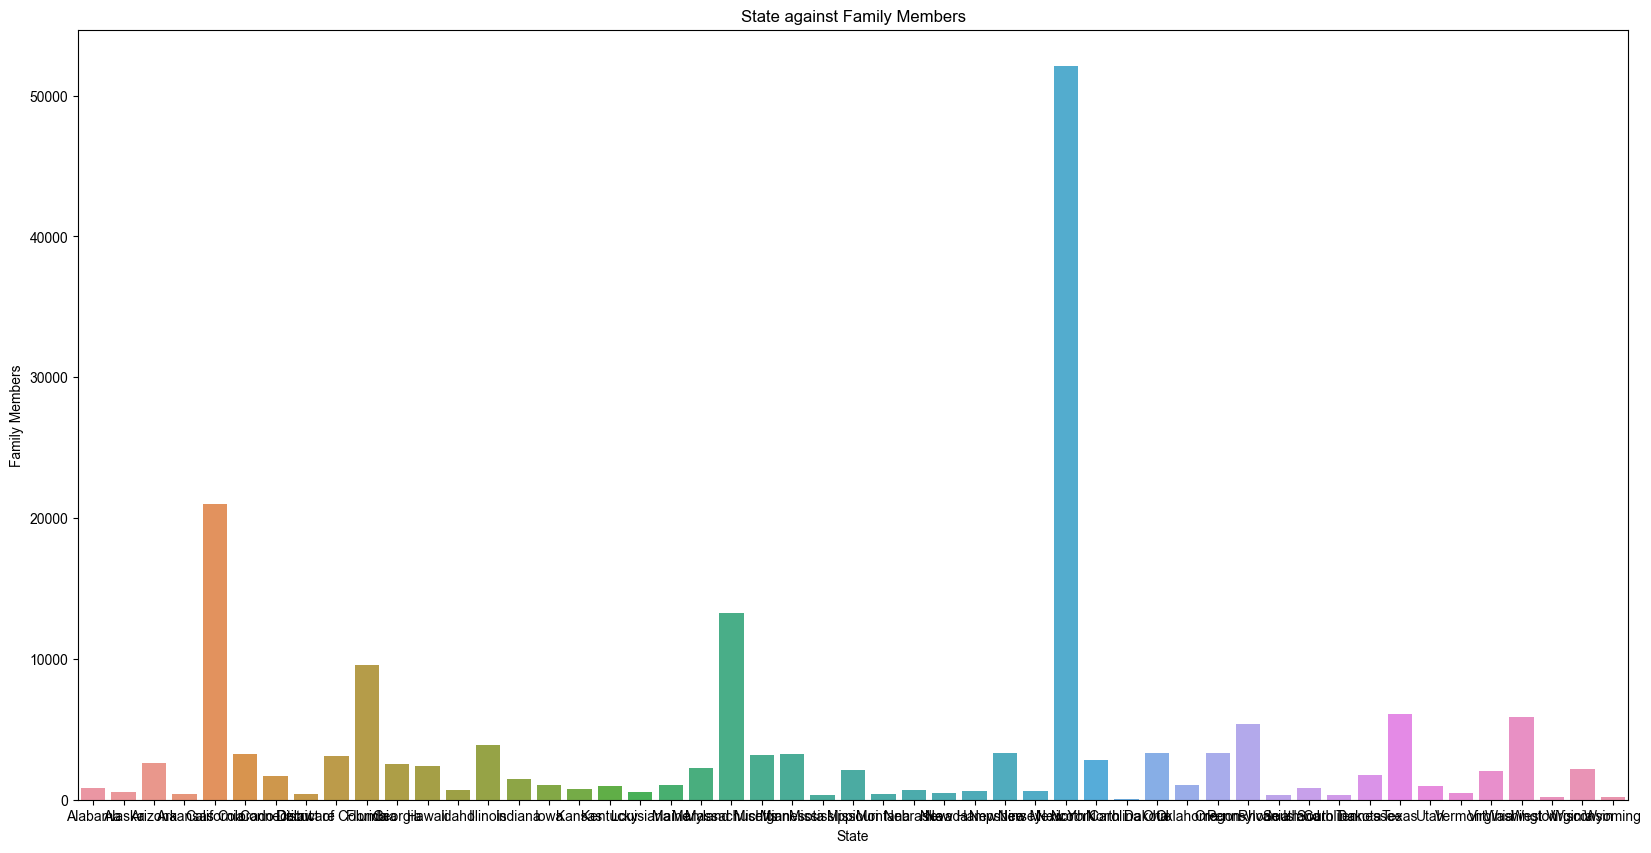

In [18]:
fig = plt.subplots(figsize=(20, 10))
sns.barplot(data=homelessness, x='state', y='family_members', hue_order='state').set(
    title = "State against Family Members", xlabel = 'State', ylabel = "Family Members")
sns.set_theme(style='darkgrid', palette='deep', font_scale=1)

In [19]:
fig = px.bar(homelessness, x='state', y='family_members', color='state', title="State Vs Family Members")
fig.update_layout(xaxis_title = 'State', yaxis_title = 'Family Members')
fig.show()



In [20]:
#State with the highest individuals
ind = homelessness.loc[homelessness['individuals']==homelessness['individuals'].max(),'state'].unique()
print(f' State with highest individuals:{ind}')

 State with highest individuals:['California']


[Text(0.5, 1.0, 'State Vs State Population'),
 Text(0.5, 0, 'State'),
 Text(0, 0.5, 'State Population')]

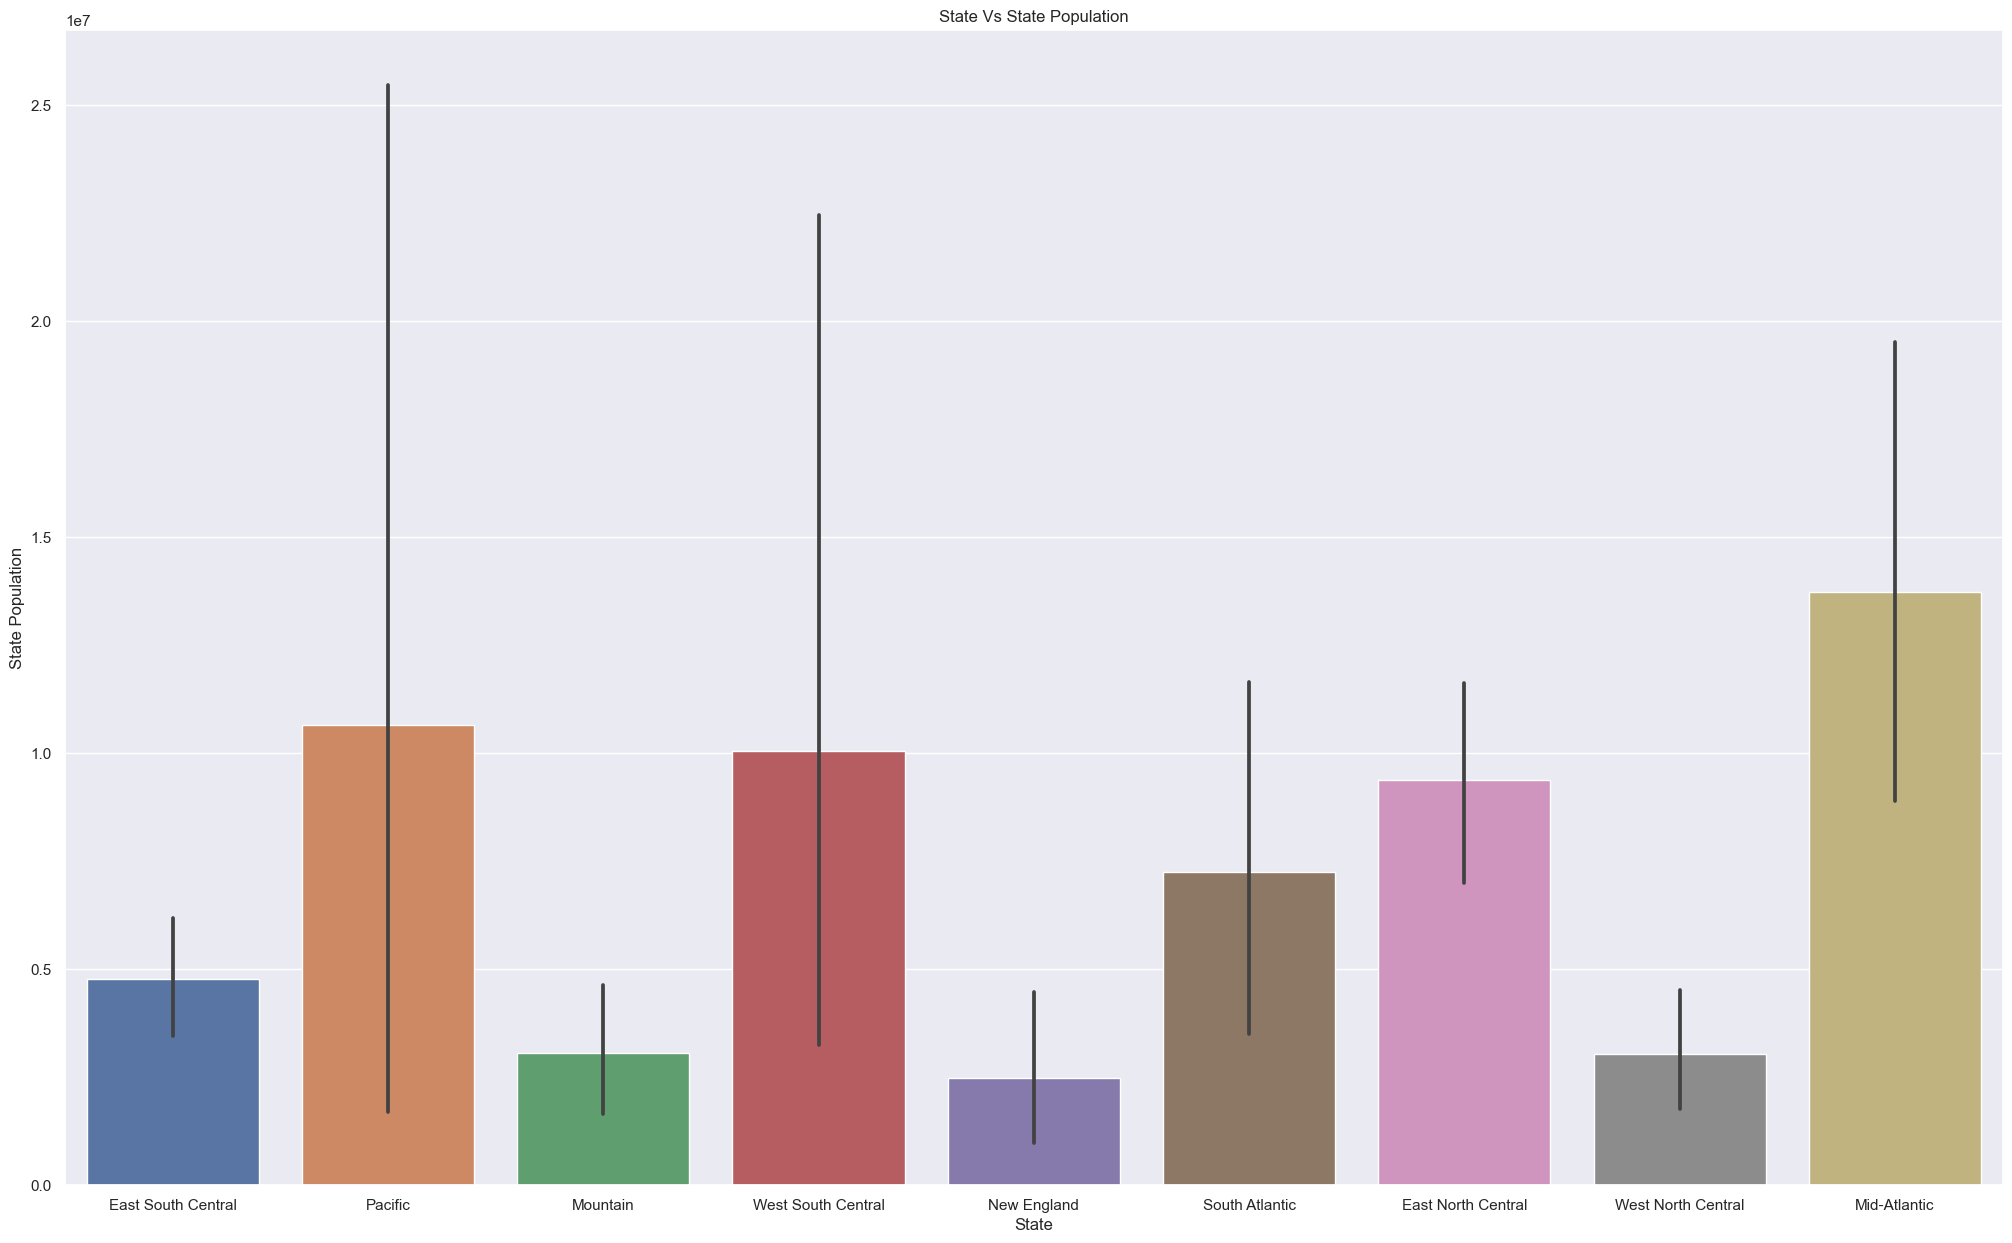

In [21]:
#Plot a barplot of States against Individuals

fig= plt.subplots(figsize =(25,15))
sns.barplot(data = homelessness, x = homelessness['region'], y= homelessness['state_pop']).set(title = "State Vs State Population", xlabel= 'State', ylabel = 'State Population')


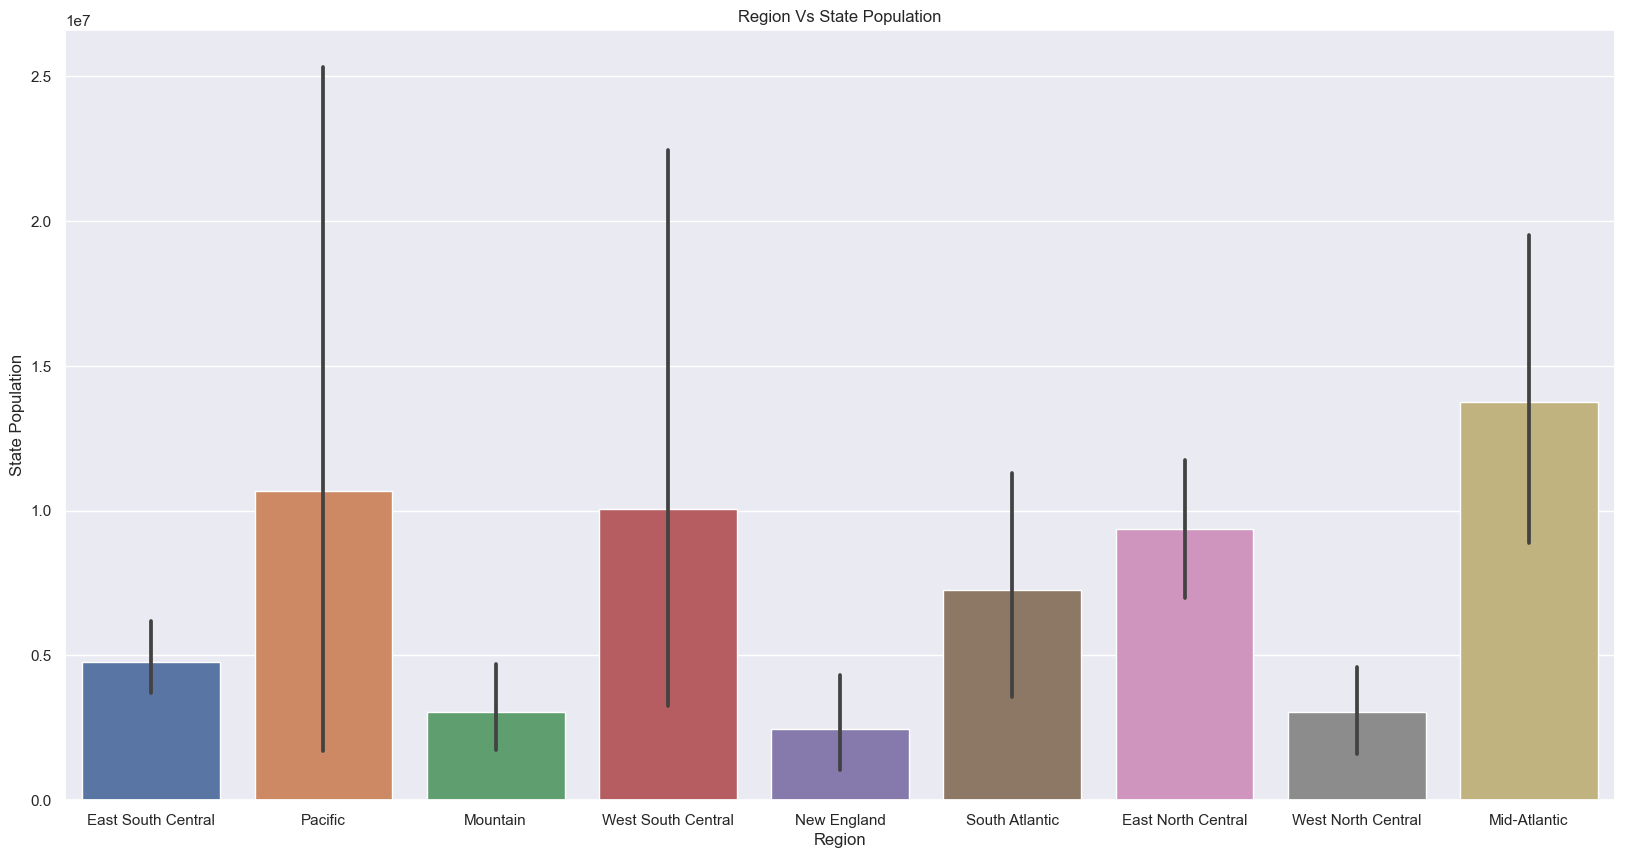

In [26]:
fig = plt.subplots(figsize =(20, 10))
sns.barplot(
    data = homelessness, x = homelessness['region'], y = homelessness['state_pop'], ).set(
        title = "Region Vs State Population", xlabel='Region', ylabel='State Population')
sns.set_theme(style='darkgrid', font_scale = 1)

In [22]:
fig = px.bar(homelessness, x='region', y='state_pop', color='state', title="Region Vs State Population")
fig.update_layout(xaxis_title = 'Region', yaxis_title = 'State Population')
fig.show()

In [23]:
fig= px.pie(homelessness, values='state_pop', names='region',title='Population of Homeless Regions')
fig.show()

[Text(0.5, 1.0, 'State Population by Family Members'),
 Text(0.5, 0, 'State Population'),
 Text(0, 0.5, 'Family Members')]

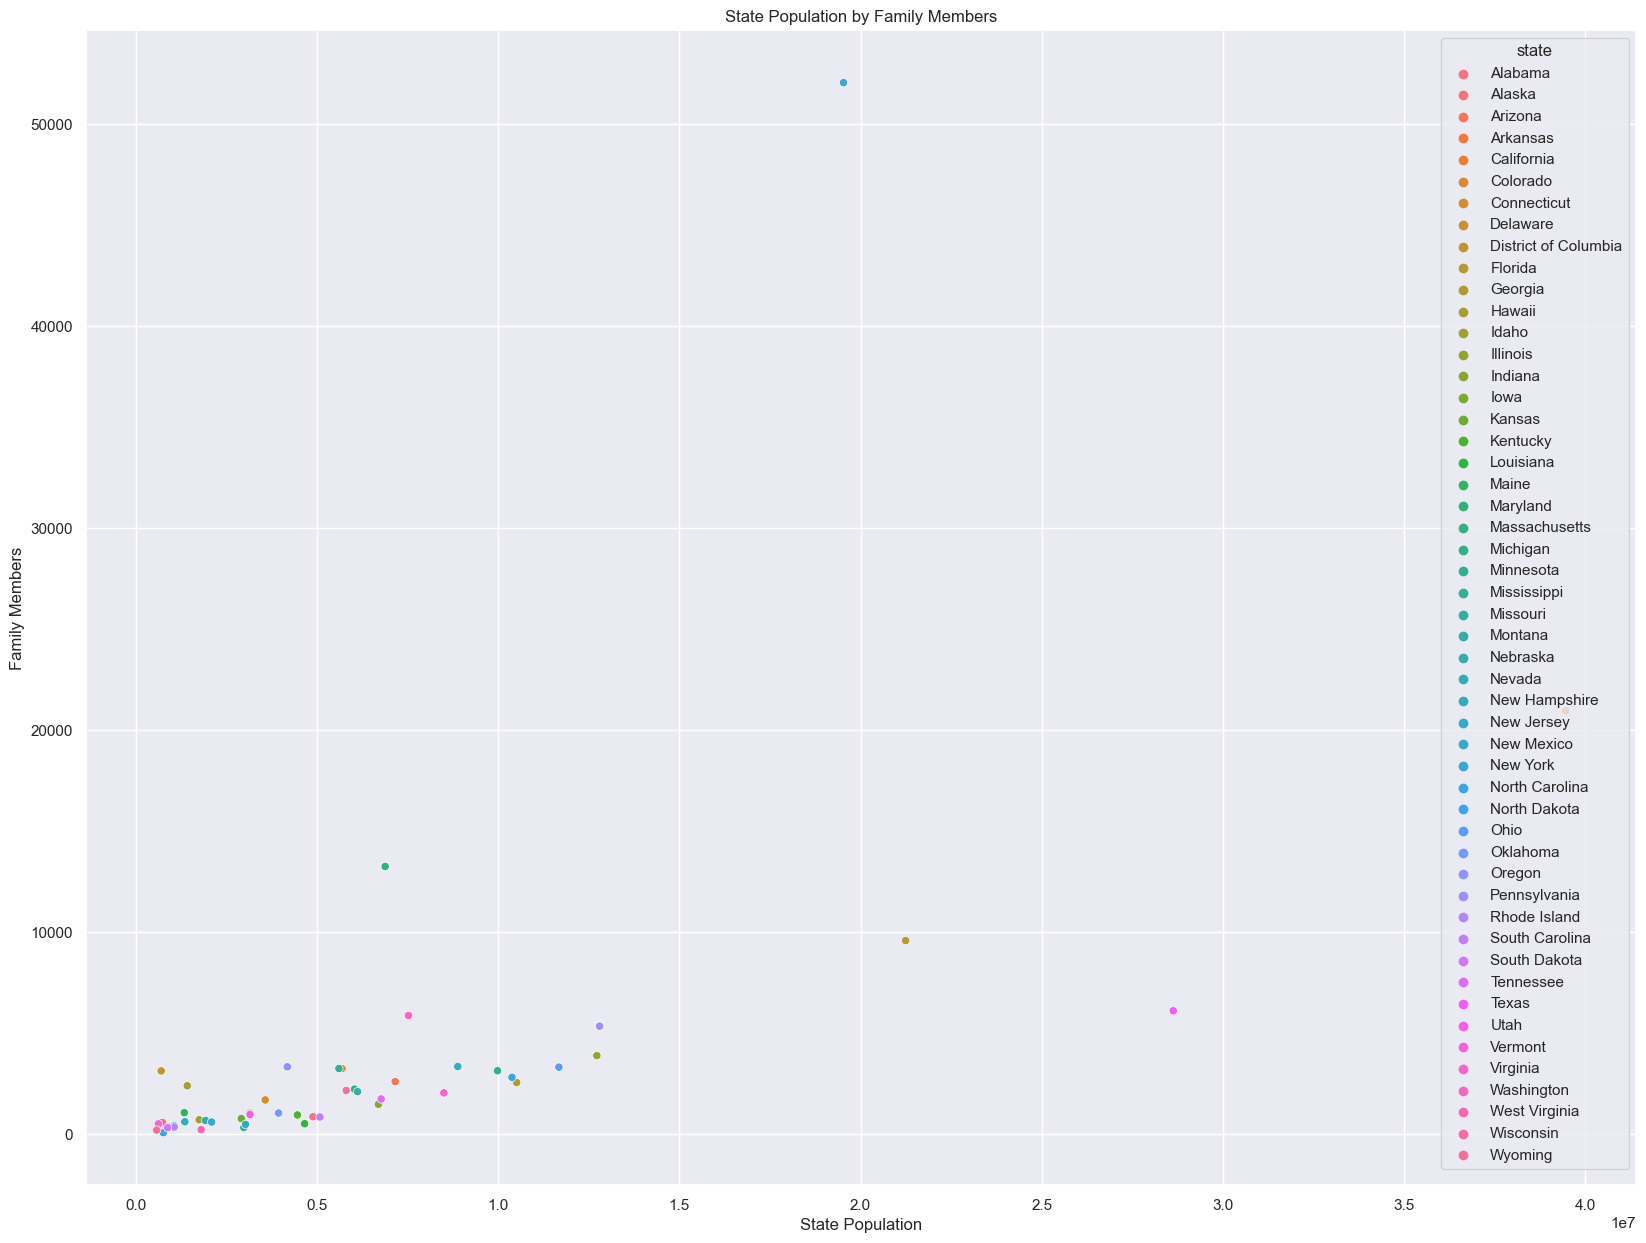

In [24]:
#Plot of State Population against Family members
fig = plt.subplots(figsize=(20, 15))
sns.scatterplot(data = 'homelessness', x = homelessness['state_pop'], y = homelessness['family_members'], hue = homelessness['state']).set(
        title = "State Population by Family Members", xlabel='State Population',  ylabel='Family Members')

In [25]:
px.scatter(homelessness, x= 'state_pop', y='family_members', color='state',
           labels=dict(state_pop = "State Population", family_members = "Family Members", state = "States"), title = "State Population by Family Members")